# Project 2 - Wrangle and Analyse Data
by Kudakwashe Verah

## Table of Contents <a name = 'contents'></a>


* [Data Gathering](#datagathering)
    * [Twitter Archive Enhanced Data](#tweetarchivedata)
    * [Image Predictions Data](#imagepredictionsdata)
    * [Twitter API Data](#twitterapidata)
    
    
* [Assessing Data](#assessingdata)
    * [Twitter Archive Enhanced Data Assessments](#dftwarcass)
    * [Image Predictions Data Assessments](#dfimgpredass)
    * [Twitter API Data Assessments](#dfjsonass)
    
    
* [Cleaning Data](#cleaningdata)
    * [Issue #1 - Remove the retweets.](#issue1)
    * [Issue #2 - Change `tweet_id` data type.](#issue2)
    * [Issue #3 - Change the `timestamp` data type.](#issue3)
    * [Issue #4 - Change the `rating_numerator` data type.](#issue4)
    * [Issue #5 - Remove the null values from the `expanded_urls` column.](#issue5)
    * [Issue #6 - Remove the non-dog names.](#issue6)
    * [Issue #7 - Change the dog breed types to lowercase.](#issue7)
    * [Issue #8 - Extract the dog ratings from the tweet's text.](#issue8)
    * [Issue #9 - Remove the '/' character from the dog ratings.](#issue9)
    * [Issue #10 - Drop the retweet related columns.](#issue10)
    * [Issue #11 - Combine the dog stage columns.](#issue11)
    * [Issue #12 - Make a master dataset.](#issue12)
    
    
* [Storing Data](#storingdata)


* [Analysing and Visualising Data](#analysevizdata)
    * [Insight #1 - Which is the `most retweeted` photo?](#insight1)
    * [Insight #2 - Which is the `most liked` tweet?](#insight2)
    * [Insight #3 - Which is the `most common` dog type?](#insight3)
    * [Visualisation #1 - Do tweets with higher ratings also have the most likes?](#viz1)
    * [Visualisation #2 - What is the correlation between the `retweet_count and the favourite_count`?](#viz2)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import requests
import tweepy as tweepy
import json
from tweepy.parsers import JSONParser

import time
import re

import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering <a name = 'datagathering'></a>

### Twitter Archive Enhanced Data <a name = 'tweetarchivedata'></a>

In [2]:
# Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Image Predictions Data <a name = 'imagepredictionsdata'></a>

In [3]:
# Download the image predictions from the Udacity servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# check for success using the response code
response # response [200] is a success!

<Response [200]>

In [4]:
# save the image predictions
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)
    
# read in the image predictions file
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API Data <a name = 'twitterapidata'></a>

In [5]:
# query additional data via the Twitter API and the tweepy library
consumer_key = '#############################'
consumer_secret = '#############################'
access_token = '########################################################'
access_secret = '#########################################'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = JSONParser(), wait_on_rate_limit = True)

In [6]:
# Get the tweets and also the missing tweets.
df_list = []
tweet_errors_list = []

tweets = df_twitter_archive['tweet_id']
now = time.time()

for index, i in enumerate(tweets):
    try:
        start = time.time()
        tweet = api.get_status(i, tweet_mode = 'extended')
        end = time.time()
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_list.append({'tweet_id':int(i),
                        'retweet_count':int(retweet_count),
                        'favourite_count':int(favorite_count)
                       })

    except Exception as e:
        print(str(i) + str(e))
        tweet_errors_list.append(i)

then = time.time()
time_span = round(then - now)
print('Completed. Time passed is {}:{}'.format(time_span // 60, time_span % 60))

888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937[{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320[{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130[{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856[{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560[{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705[{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984[{'code': 144, 'message': 'No status found wit

In [7]:
# save df of tweets to JSON then convert to a dataframe
df_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favourite_count'])
df_json.to_json('tweet-json.txt')

df_json = pd.read_json('tweet-json.txt')

In [8]:
df_json.head(10)

,tweet_id,retweet_count,favourite_count
0,892420643555336193,6964,33674
1,892177421306343426,5269,29216
10,890006608113172480,6112,26915
100,872486979161796608,7681,35971
1000,745789745784041472,961,3650
1001,745712589599014916,2115,6475
1002,745433870967832576,2299,6513
1003,745422732645535745,2189,7923
1004,745314880350101504,2467,6579
1005,745074613265149952,3171,7245


## Assessing Data <a name = 'assessingdata'></a>

[back to the top](#contents)

### __df_twitter_archive assessments__ <a name = 'dftwarcass'></a>

In [9]:
df_twitter_archive.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1891,674764817387900928,NaN,NaN,2015-12-10 01:37:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two pups are masters of camouflage. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674764817...,10,10,None,None,None,None,None
321,834209720923721728,NaN,NaN,2017-02-22 01:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. He's aware that he has somethi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834209720...,12,10,Wilson,None,None,None,None
1441,696877980375769088,NaN,NaN,2016-02-09 02:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She's in a predicament. Not sur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696877980...,9,10,Misty,None,None,pupper,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
1970,673295268553605120,NaN,NaN,2015-12-06 00:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Eve. She's a raging alcoholic 8/10 (would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
644,793180763617361921,NaN,NaN,2016-10-31 20:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Newt. He's a strawberry. 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793180763...,11,10,Newt,None,None,None,None
1680,682003177596559360,NaN,NaN,2015-12-30 01:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Wrinkly as hell. Weird segmen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682003177...,5,10,None,None,None,None,None
2278,667435689202614272,NaN,NaN,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667435689...,12,10,None,None,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
314,835172783151792128,NaN,NaN,2017-02-24 17:01:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835172783...,12,10,None,None,None,None,None


In [10]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df_twitter_archive['tweet_id'].duplicated().sum()

0

In [13]:
df_twitter_archive.groupby('rating_numerator').size()

rating_numerator
0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
dtype: int64

In [14]:
df_twitter_archive.groupby('rating_denominator').size()

rating_denominator
0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
dtype: int64

In [15]:
df_twitter_archive.groupby('name').size()

name
Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old    

In [16]:
df_twitter_archive['rating_numerator'].isnull().sum()

0

In [17]:
df_twitter_archive['rating_denominator'].isnull().sum()

0

In [18]:
df_twitter_archive['expanded_urls'].isnull().sum()

59

### Quality issues
1. We have retweets in the `text` column.

2. The `tweet_id` data type is integer instead of string.

3. The `timestamp` data type is string instead of datetime.

4. The `rating_numerator` data type is integer instead of float.

5. The `rating_denominator` column should almost always be a value of 10 for all tweets.

6. There are 59 null entries in the `expanded_urls` column.

7. The `name` column has names that are incorrect: 'this', 'very', 'an', 'the', 'a', 'None', etc.

8. Some ratings in the `rating_numerator` column may be inaccurate.

### Tidiness issues
1. The dog stage columns: `doggo, floofer, pupper, puppo` are separated into four columns although they describe one observation.

2. We do not need the `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp` columns.

### __image_predictions_assessments__ <a name = 'dfimgpredass'></a>

In [19]:
image_predictions.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1258,748692773788876800,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False
2011,879008229531029506,https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg,1,vizsla,0.960513,True,miniature_pinscher,0.009431,True,American_Staffordshire_terrier,0.008711,True
585,678991772295516161,https://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg,1,Eskimo_dog,0.330216,True,Siberian_husky,0.187003,True,Chihuahua,0.101420,True
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
1199,740711788199743490,https://pbs.twimg.com/media/CkeJcNkXEAAcrks.jpg,1,toy_poodle,0.388277,True,Angora,0.180264,False,Persian_cat,0.049656,False
1808,832636094638288896,https://pbs.twimg.com/media/C44eG7oUMAAA4Ss.jpg,1,Eskimo_dog,0.525032,True,Siberian_husky,0.252238,True,malamute,0.216839,True
46,666804364988780544,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1,English_setter,0.328792,True,Brittany_spaniel,0.283545,True,Ibizan_hound,0.057461,True
392,673580926094458881,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,beagle,0.985062,True,basset,0.006418,True,Walker_hound,0.003533,True
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True
1716,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False


In [20]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
image_predictions['tweet_id'].duplicated().sum()

0

In [22]:
image_predictions['jpg_url'].duplicated().sum()

66

In [23]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_predictions.groupby('p1').size()

p1
Afghan_hound                       4
African_crocodile                  1
African_grey                       1
African_hunting_dog                1
Airedale                          12
American_Staffordshire_terrier    13
American_black_bear                1
Angora                             2
Appenzeller                        2
Arabian_camel                      3
Arctic_fox                         4
Australian_terrier                 2
Bedlington_terrier                 5
Bernese_mountain_dog              10
Blenheim_spaniel                  11
Border_collie                     12
Border_terrier                     7
Boston_bull                        9
Brabancon_griffon                  3
Brittany_spaniel                   7
Cardigan                          19
Chesapeake_Bay_retriever          23
Chihuahua                         83
Christmas_stocking                 3
Dandie_Dinmont                     6
Doberman                           8
Egyptian_cat                       

In [25]:
image_predictions.groupby('p2').size()

p2
Afghan_hound                       5
African_hunting_dog                1
Airedale                           7
American_Staffordshire_terrier    21
American_alligator                 2
American_black_bear                3
Angora                             4
Appenzeller                        3
Arabian_camel                      4
Arctic_fox                         4
Australian_terrier                 2
Bedlington_terrier                 5
Bernese_mountain_dog               1
Blenheim_spaniel                   4
Border_collie                     12
Border_terrier                     4
Boston_bull                       19
Brabancon_griffon                 10
Brittany_spaniel                   8
Cardigan                          73
Chesapeake_Bay_retriever          41
Chihuahua                         44
Christmas_stocking                 3
Dandie_Dinmont                     4
Doberman                           6
English_foxhound                   2
English_setter                     

In [26]:
image_predictions.groupby('p3').size()

p3
Afghan_hound                       4
African_chameleon                  1
African_grey                       1
Airedale                          11
American_Staffordshire_terrier    24
American_black_bear                1
Angora                             2
Appenzeller                       11
Arabian_camel                      3
Arctic_fox                         5
Australian_terrier                 8
Band_Aid                           1
Bernese_mountain_dog               2
Blenheim_spaniel                   2
Border_collie                     11
Border_terrier                     6
Boston_bull                       17
Bouvier_des_Flandres               2
Brabancon_griffon                  7
Brittany_spaniel                  11
Cardigan                          23
Chesapeake_Bay_retriever          27
Chihuahua                         58
Christmas_stocking                 2
Dandie_Dinmont                     4
Doberman                           7
Egyptian_cat                       

### Quality issues
1. The `tweet_id` data type should be string not integer.

2. Some names in the `p1, p2 and p3` columns are capitalised and some aren't.

### Tidiness issues
1. The datasets df_twitter_archive, image_predictions and df_json all describe the same tweets but they are separate datasets.

### __df_json assessments__ <a name = 'dfjsonass'></a>

In [27]:
df_json.sample(50)

,tweet_id,retweet_count,favourite_count
156,860276583193509888,3055,16521
438,818259473185828864,2071,10375
385,824297048279236611,3553,14170
825,765719909049503744,1981,6781
1420,696405997980676096,1050,2920
1665,681297372102656000,850,2950
1313,704847917308362754,1363,4683
1343,702276748847800320,694,2278
1188,714982300363173890,929,3421
346,829449946868879360,1854,9840


In [28]:
df_json.describe()

,tweet_id,retweet_count,favourite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2457.432316,7021.957456
std,6.820795e+16,4160.982797,10910.391092
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1219.000000
50%,7.178418e+17,1143.000000,3035.000000
75%,7.986547e+17,2844.500000,8561.000000
max,8.924206e+17,70276.000000,144065.000000


In [29]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 999
Data columns (total 3 columns):
tweet_id           2327 non-null int64
retweet_count      2327 non-null int64
favourite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 72.7 KB


In [30]:
df_json['tweet_id'].duplicated().sum()

0

### Quality issues
1. The `tweet_id` date type should be string not integer.

### Tidiness issues
1. The datasets df_twitter_archive, image_predictions and df_json all describe the same tweets but they are separate datasets.

## Cleaning Data <a name = 'cleaningdata'></a>

[back to the top](#contents)

In [31]:
# Make copies of original pieces of data
df_twitter_archive_clean = df_twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_json_clean = df_json.copy()

### Issue #1 - Remove the retweets. <a name = 'issue1'></a>

#### Define
We need to remove the retweets in the dataset by selecting only the rows that have null values in the `retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp` columns in the df_twitter_archive_clean dataset.

#### Code

In [32]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.isnull()]
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_user_id.isnull()]
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [33]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2 - Change the `tweet_id` data type. <a name = 'issue2'></a>

#### Define
Change the `tweet_id` data type from integer to string in all 3 datasets.

#### Code

In [34]:
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
df_json_clean['tweet_id'] = df_json_clean['tweet_id'].astype(str)

#### Test

In [35]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(2), object(

In [36]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [37]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 999
Data columns (total 3 columns):
tweet_id           2327 non-null object
retweet_count      2327 non-null int64
favourite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 72.7+ KB


### Issue #3 - Change the `timestamp` data type. <a name = 'issue3'></a>

#### Define
Change the `timestamp` data type from string to datetime in the df_twitter_archive_clean dataset.

#### Code

In [38]:
# change the data type to datetime
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp']).dt.tz_localize(None)

#### Test

In [39]:
df_twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1656,683357973142474752,NaN,NaN,2016-01-02 18:43:31,"<a href=""http://twitter.com/download/iphone"" r...","""Have a seat, son. There are some things we ne...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683357973...,10,10,None,None,None,None,None
1124,730211855403241472,NaN,NaN,2016-05-11 01:44:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Ziva. She doesn't know how her collar ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730211855...,11,10,Ziva,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
962,750868782890057730,NaN,NaN,2016-07-07 01:47:22,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo. He hauled ass until he ran out of t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750868782...,11,10,Milo,None,None,pupper,None
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlen and Thumpelina. They are best pa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746056683...,11,10,Arlen,None,None,None,None


### Issue #4 - Change the `rating_numerator` data type. <a name = 'issue4'></a>

#### Define
Change the `rating_numerator` data type from integer to float in the df_twitter_archive_clean dataset.

#### Code

In [40]:
# change the data type to int
df_twitter_archive_clean['rating_numerator'] = df_twitter_archive_clean['rating_numerator'].astype(float)

#### Test

In [41]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), 

### Issue #5 - Remove the null values from the `expanded_urls` column. <a name = 'issue5'></a>

#### Define
Drop the 59 null valued `expanded_urls` columns in the df_twitter_archive_clean dataset.

#### Code

In [42]:
# drop the null values
df_twitter_archive_clean['expanded_urls'].dropna(inplace = True)

#### Test

In [43]:
'NaN' in df_twitter_archive_clean['expanded_urls']

False

### Issue #6 - Remove the  non-dog names. <a name = 'issue6'></a>

#### Define: 
Remove all the non-dog names. Since a dog's name is capitalised, all the inaccurate dog names are in lower case, therefore, we will use this to clean up the `name` column in the df_twitter_archive_clean dataset.

#### Code

In [44]:
# remove the inaccurate dog names

mask = df_twitter_archive_clean.name.str.islower() 

column_name = 'name' 

df_twitter_archive_clean.loc[mask, column_name] = np.nan

#### Test

In [45]:
df_twitter_archive_clean.groupby('name').size()

name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfy            1
Alice           2
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
Anthony         1
Antony          1
Apollo          1
               ..
Walker          1
Wallace         3
Wally           2
Walter          3
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Yoda            1
Yogi            2
Yukon           1
Zara            1
Zeek            1
Zeke            3
Zeus 

### Issue #7 - Change the dog breed types to lowercase. <a name = 'issue7'></a>

#### Define
Change all the dog breed types in `p1`, `p2`, `p3` to lower case in the image_predictions_clean dataset.

#### Code

In [46]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#### Test

In [47]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
136,668507509523615744,https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg,1,basenji,0.055379,True,shetland_sheepdog,0.054322,True,whippet,0.051913,True
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,siberian_husky,0.368137,True,eskimo_dog,0.177822,True
1647,808733504066486276,https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg,1,seat_belt,0.779137,False,toy_poodle,0.036927,True,golden_retriever,0.016972,True
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,staffordshire_bullterrier,0.757547,True,american_staffordshire_terrier,0.149950,True,chesapeake_bay_retriever,0.047523,True
1305,753375668877008896,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,1,bluetick,0.360071,True,crutch,0.134816,False,tripod,0.098207,False
112,667911425562669056,https://pbs.twimg.com/media/CUTl5m1WUAAabZG.jpg,1,frilled_lizard,0.257695,False,ox,0.235160,False,triceratops,0.085317,False
1987,872620804844003328,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,1,cocker_spaniel,0.513191,True,sussex_spaniel,0.159088,True,standard_poodle,0.149509,True
812,692530551048294401,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,1,siberian_husky,0.486428,True,eskimo_dog,0.448518,True,white_wolf,0.041506,False
222,670290420111441920,https://pbs.twimg.com/media/CU1Zgk7UcAAjw2t.jpg,1,chihuahua,0.368876,True,pomeranian,0.282102,True,papillon,0.178795,True
818,692901601640583168,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,1,soft-coated_wheaten_terrier,0.403496,True,cocker_spaniel,0.135164,True,golden_retriever,0.088719,True


### Issue #8 - Extract the dog ratings from the tweet's text. <a name = 'issue8'></a>

#### Define
Extract the numerator ratings from the tweet text and replace the values in the `rating_numerator` column in the df_twitter_archive_clean dataset.

#### Code

In [48]:
df_twitter_archive_clean['rating_numerator'] = df_twitter_archive_clean.text.str.extract('(\d?\d*\.?\d\d*/)', expand = False)

#### Test

In [49]:
df_twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1172,720389942216527872,NaN,NaN,2016-04-13 23:15:21,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphé. He patrols the lake. Looking f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720389942...,11/,10,Ralphé,None,None,None,None
1894,674743008475090944,NaN,NaN,2015-12-10 00:10:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just saw a spider. 10/10 d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674743008...,10/,10,Sophie,None,None,None,None
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wants to know if you have ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511...,11/,10,Charlie,None,None,None,None
1497,692423280028966913,6.924173e+17,4.196984e+09,2016-01-27 19:05:49,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: just noticed this dog has some extra ...,NaN,NaN,NaN,NaN,9/,10,None,None,None,None,None
570,801854953262350336,8.018543e+17,1.185634e+07,2016-11-24 18:28:13,"<a href=""http://twitter.com/download/iphone"" r...",.@NBCSports OMG THE TINY HAT I'M GOING TO HAVE...,NaN,NaN,NaN,NaN,11/,10,None,None,None,None,None


### Issue #9 - Remove the '/' character from the dog ratings. <a name = 'issue9'></a>

#### Define
Remove the '/' character from the `rating_numerator` column values in the df_twitter_archive_clean dataset so we can convert the column data type to integer.

#### Code

In [50]:
df_twitter_archive_clean['rating_numerator'].replace('/','', regex = True, inplace = True)

#### Test

In [51]:
df_twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
989,748932637671223296,NaN,NaN,2016-07-01 17:33:49,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Divine Doggo. Must be magical af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748932637...,13,10,Divine,doggo,None,None,None
2020,672095186491711488,NaN,NaN,2015-12-02 16:49:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Tuco. That's the toast that killed his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672095186...,9,10,Tuco,None,None,None,None
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,None,None,None,None,None
2086,670803562457407488,NaN,NaN,2015-11-29 03:16:46,"<a href=""http://twitter.com/download/iphone"" r...",I would do radical things in the name of Dog G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670803562...,10,10,None,None,None,None,None
2022,672068090318987265,NaN,NaN,2015-12-02 15:01:33,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's upset because he's no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672068090...,7,10,Gizmo,None,None,None,None


### Issue #10 - Drop the retweet related columns. <a name = 'issue10'></a>

#### Define
Drop the columns `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp` in the df_twitter_archive_clean dataset as we do not need them.

#### Code

In [52]:
# drop the unwanted columns
drop_columns = {'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'}

df_twitter_archive_clean.drop(drop_columns, axis = 1, inplace = True)

#### Test

In [53]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null object
rating_denominator    2175 non-null int64
name                  2071 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 220.9+ KB


### Issue #11 - Combine the dog stage columns. <a name = 'issue11'></a>

#### Define
Combine the dog stage columns into one column called `stage` with the values being the dog stages.

#### Code

In [54]:
# substitute the NaN values with null values.
# drop the unwanted columns
dog_stages = {'doggo', 'floofer', 'pupper', 'puppo'}

for dog_stages in df_twitter_archive_clean:
    df_twitter_archive_clean.replace(np.nan, '', inplace = True)

# define a function for getting the dog stages    
df_twitter_archive_clean['stage'] = 'None'

def get_dog_stages(row):
    stage = []
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    
    if len(stage) < 1:
        row['stage'] = np.nan
    else:
        row['stage'] = '_'.join(stage)
        
    return row

df_twitter_archive_clean = df_twitter_archive_clean.apply(get_dog_stages, axis = 1)

In [55]:
df_twitter_archive_clean['stage'].value_counts().sort_values()

doggo_floofer      1
puppo_doggo        1
floofer            9
doggo_pupper      10
puppo             24
doggo             75
pupper           224
Name: stage, dtype: int64

In [56]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [57]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null object
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 344 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 169.9+ KB


### Issue #12 - Make a master dataset. <a name = 'issue12'></a>

#### Define
Combine all three cleaned datasets into one master dataset called df_twitter_master.

#### Code

In [58]:
# first combine df_twitter_archive_clean and image_predictions_clean datasets
archive_predictions = pd.merge(df_twitter_archive_clean, image_predictions_clean, how = 'left', on = 'tweet_id')

# check if the code worked
archive_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null object
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 344 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
dtypes: datetime64[ns](

In [59]:
# now combine archive_predictions with the df_json_clean dataset to make the master dataset
df_twitter_master = pd.merge(archive_predictions, df_json_clean, how = 'left', on = 'tweet_id')

In [60]:
# change the data type of rating_numerator from string to float
df_twitter_master['rating_numerator'] = df_twitter_master['rating_numerator'].astype(float)

#### Test

In [61]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 344 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_count         

## Storing Data <a id='storingdata'></a>

[back to the top](#contents)

In [62]:
# store the cleaned dataframe to a CSV file named twitter_archive_master.csv
df_twitter_master.to_csv('twitter_archive_master.csv', index = False)

## Analysing and Visualising Data <a id='analysevizdata'></a>

[back to the top](#contents)

In [63]:
# increase the column width to allow us to see the urls clearly
pd.set_option('display.max_colwidth', 150)

### Insight #1 - Which is the `most retweeted` photo? <a name = 'insight1'></a>

In [64]:
"""
Find the maximum value in the `retweet_count` column and then use the query function to locate that row.
"""
idx = df_twitter_master.retweet_count.max()
print(idx)

70276.0


In [65]:
max_retweet = df_twitter_master.query('retweet_count == 70276')
max_retweet

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count
862,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,70276.0,144065.0


In [66]:
# extract the jpg url of the image with the most retweets
max_retweet_jpg_url = max_retweet['jpg_url']
print(max_retweet_jpg_url)

862    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object


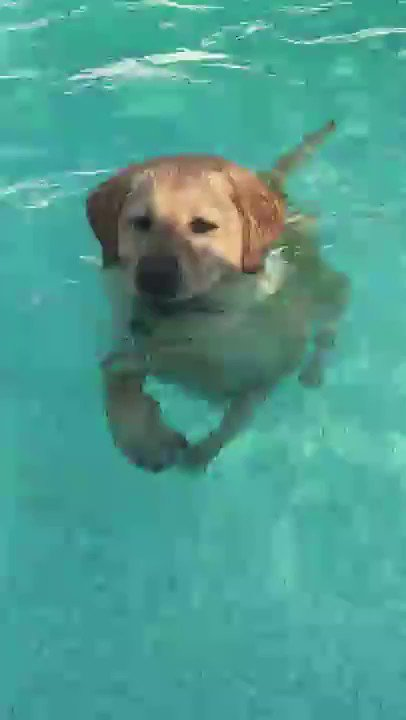

In [67]:
# download and save the most retweeted image then show it below
max_retweet_jpg = requests.get('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg').content
with open('max_retweets_image.jpg', 'wb') as file:
     file.write(max_retweet_jpg)
        
from IPython.display import Image

Image(filename = 'max_retweets_image.jpg')

#### Observations
The tweet with `tweet_id: 744234799360020481` is the most retweeted tweet with __70,276 retweets__. The tweet is an image of a dog standing in a pool as seen above.

### Insight #2 - Which is the `most liked` tweet? <a name = 'insight2'></a>

In [68]:
"""
Find the minimum value in the `favourite_count` column and then use the query function to locate that row.
"""
idm = df_twitter_master.favourite_count.max()
print(idm)

144065.0


In [69]:
most_liked = df_twitter_master.query('favourite_count == 144065')
most_liked

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count
862,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,70276.0,144065.0


In [70]:
# extract the jpg url of the image with the least likes
most_liked_jpg_url = most_liked['jpg_url']
print(most_liked_jpg_url)

862    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object


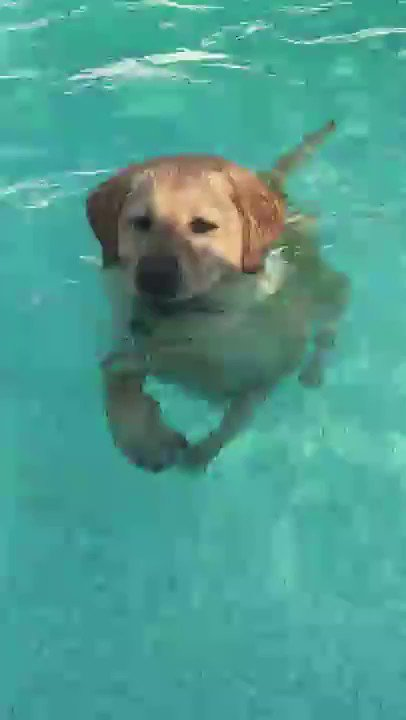

In [71]:
# download and save the least liked image then show it below
most_liked_jpg = requests.get('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg').content
with open('most_liked_image.jpg', 'wb') as file:
     file.write(most_liked_jpg)
        
from IPython.display import Image

Image(filename = 'most_liked_image.jpg') 

#### Observations
The tweet with `tweet_id: 744234799360020481` has the least liked image with __144,065 likes__. The image is of a dog standing in a pool as seen above.

### Insight #3 - Which is the `most common` dog stage? <a name = 'insight3'></a>

In [72]:
df_twitter_master.groupby('stage').size().sort_values()

stage
doggo_floofer      1
puppo_doggo        1
floofer            9
doggo_pupper      10
puppo             24
doggo             75
pupper           224
dtype: int64

#### Observations
The most common dog stage is the `pupper` stage. There are __224 puppers.__

### Visualisation #1 - Do tweets with higher ratings also have the most likes? <a name = 'viz1'></a>
What is the relationship between the `rating_numerator` and the number of likes `(favourite_count)` on the tweets?

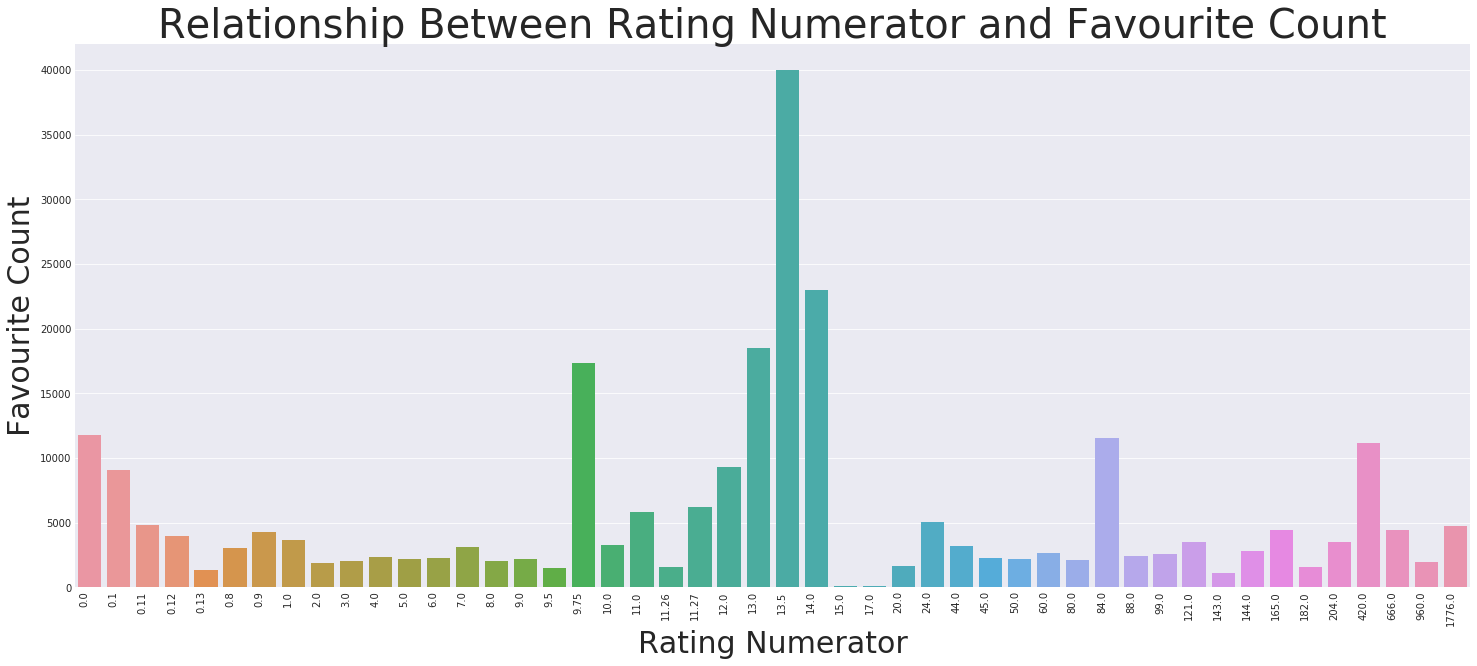

In [73]:
"""
We will create a new dataframe with only the columns that we require for this visual analysis.
We will then plot the chart.
"""
# set plot style
sns.set_style('darkgrid')

# create dataframe of columns that we need
df_viz_1 = df_twitter_master[['rating_numerator', 'favourite_count']]

# set figure size
fig, viz_1 = plt.subplots(figsize = (25, 10))

# plot barplot and lineplot
viz_1 = sns.barplot('rating_numerator', 'favourite_count', data = df_viz_1, ci = None)

# set xlabel and size
viz_1.set_xlabel('Rating Numerator', size = 30)

# set ylabel and size
viz_1.set_ylabel('Favourite Count', size = 30)

# set title label and size
viz_1.set_title('Relationship Between Rating Numerator and Favourite Count', size = 40)

# adjust x axis ticklabels 90 degrees
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation = 90, horizontalalignment= 'right')

# save the plot
plt.savefig('relationship-between-rating-numerator-and-fav-count.jpg')

In [74]:
# percentage difference
((40000 - 5000) / 40000) * 100

87.5

#### Observations:
Tweets with a rating of __13.5/10__ have more likes, about 40000 of them in fact as compared to the tweets with a rating of _1776/10_, which only 5000 likes. This is a percentage difference of _87.5%_ which is huge.

### Visualisation #2 - What is the correlation between the `retweet_count` and the `favourite_count`? <a name = 'viz2'></a>

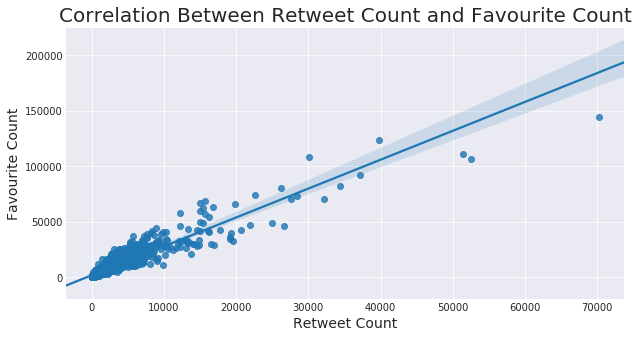

In [75]:
"""
We will create a new dataframe with only the columns that we require for this visual analysis.
We will then plot the chart.
"""
# set plot style
sns.set_style('darkgrid')

# create dataframe of columns that we need
df_viz_2 = df_twitter_master[['retweet_count', 'favourite_count']]

# set figure size
fig, viz_2 = plt.subplots(figsize = (10, 5))

# plot barplot and lineplot
viz_2 = sns.regplot('retweet_count', 'favourite_count', data = df_viz_2)

# set xlabel and size
viz_2.set_xlabel('Retweet Count', size = 14)

# set ylabel and size
viz_2.set_ylabel('Favourite Count', size = 14)

# set title label and size
viz_2.set_title('Correlation Between Retweet Count and Favourite Count', size = 20)

# save the plot
plt.savefig('correlation-between-retweet-count-and-fav-count.jpg')

#### Observations:
By looking at the graph above, we can observe that there is a positive correlation between the amount of retweets that a tweet gets and how many likes it receives. As such, we can infer that there is a high chance that a tweet with a greater number of retweets will also have a great number of likes.

[back to the top](#contents)